In [1]:
pip install --upgrade matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib
print(matplotlib.__version__)


3.10.1


Données chargées :
Fréquences : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.000000000000001, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.000000000000002, 15.0, 16.0, 17.0, 18.0, 19.0]
Magnitudes : [6.994405055138486e-15, 8.178201078779536e-15, 1.1567069537560152e-14, 1.4095011584298678e-14, 1.6260717144853226e-15, 50.00000000000002, 1.6700739962352418e-14, 6.477701821198131e-15, 2.368947728193158e-14, 3.833084183753514e-15, 1.7530013745756942e-15, 1.2052345373807108e-14, 9.791268598690766e-15, 2.8392488713289194e-14, 1.943247117728196e-14, 1.7416463357094397e-14, 1.7421040808987478e-14, 3.262261471588943e-14, 3.567091463915702e-14, 1.81637341020579e-14]


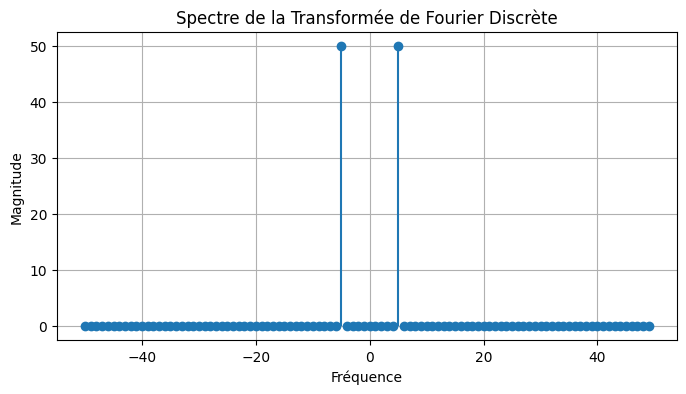

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def dft(x):
    #Calcule la Transformée de Fourier Discrète (TFD) 
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

N = 100 
f0 = 5 
n = np.arange(N)
signal = np.sin(2 * np.pi * f0 * n / N)  
X_dft = dft(signal)
freqs = np.fft.fftfreq(N) * N  

#  fichier CSV
csv_filename = "tfd_data.csv"
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Fréquence", "Magnitude", "Phase"])
    for k in range(N):
        magnitude = np.abs(X_dft[k])
        phase = np.angle(X_dft[k])
        writer.writerow([freqs[k], magnitude, phase])

# Chargement CSV
freqs_loaded = []
magnitude_loaded = []
phase_loaded = []

with open(csv_filename, mode="r") as file:
    reader = csv.reader(file)
    next(reader)  # Ignorer l'en-tête
    for row in reader:
        freqs_loaded.append(float(row[0]))
        magnitude_loaded.append(float(row[1]))
        phase_loaded.append(float(row[2]))
    print("Données chargées :")
    print("Fréquences :", freqs_loaded[:20])  
    print("Magnitudes :", magnitude_loaded[:20])


# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.stem(freqs_loaded, magnitude_loaded, basefmt=" ")
plt.title("Spectre de la Transformée de Fourier Discrète")
plt.xlabel("Fréquence")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


 - Le spectre de la TFD présente une symétrie autour de la moitié de la fréquence d’échantillonnage.
 - Les fréquences supérieures à N/2 sont des répétitions des basses fréquences
 - La TFD brute est correcte mais inefficace pour de grands signaux.
